##Data Reading

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/drive/MyDrive/dft_merged.csv",dtype=object)
df.head(10)

,Unnamed: 0,pubmedname,twitterhandle,handlename,descrip,location,follower,friend
0,0,Boaz+Shay,@boazhepner,Boaz Hepner,"RN, movie lover, poker player",Los Angeles,356,2116
1,1,Boaz+Shay,@bleskes,Boaz Leskes,"Cloud Tech Lead, Elastic",Amsterdam,1165,128
2,2,Boaz+Shay,@shayshay2392,shay pike,NaN,"boaz, alabama",9,9
3,3,Boaz+Shay,@keyboardAnt,keyboardAnt,Theoretical ML Researcher,NaN,71,5000
4,4,Boaz+Shay,@BoazMichaely,Boaz Michaely,"DevSecOps , Cloud Native Data Protection 🎶",USA,94,13
5,5,Boaz+Shay,@quantumlev,Boaz Almog,NaN,NaN,139,148
6,6,Boaz+Shay,@smayzak,stevemayzak,"VP, Global Solution Engineering (Presales) at ...","Phoenix, AZ",627,749
7,7,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346
8,8,Boaz+Tirosh,@boaztirosh,Boaz Tirosh,NaN,"Tel-aviv, Israel",8,31
9,9,Bob+B.+M.+Wong,@bob_wong80,Bob Wong,Managing Director at Inhouse,Glasgow,34,194


In [ ]:
df_final=df.drop(['Unnamed: 0'],axis=1)
df_final.head(10)

,pubmedname,twitterhandle,handlename,descrip,location,follower,friend
0,Boaz+Shay,@boazhepner,Boaz Hepner,"RN, movie lover, poker player",Los Angeles,356,2116
1,Boaz+Shay,@bleskes,Boaz Leskes,"Cloud Tech Lead, Elastic",Amsterdam,1165,128
2,Boaz+Shay,@shayshay2392,shay pike,NaN,"boaz, alabama",9,9
3,Boaz+Shay,@keyboardAnt,keyboardAnt,Theoretical ML Researcher,NaN,71,5000
4,Boaz+Shay,@BoazMichaely,Boaz Michaely,"DevSecOps , Cloud Native Data Protection 🎶",USA,94,13
5,Boaz+Shay,@quantumlev,Boaz Almog,NaN,NaN,139,148
6,Boaz+Shay,@smayzak,stevemayzak,"VP, Global Solution Engineering (Presales) at ...","Phoenix, AZ",627,749
7,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346
8,Boaz+Tirosh,@boaztirosh,Boaz Tirosh,NaN,"Tel-aviv, Israel",8,31
9,Bob+B.+M.+Wong,@bob_wong80,Bob Wong,Managing Director at Inhouse,Glasgow,34,194


In [ ]:
df_final[df_final['pubmedname']=="Brian+Cox"]

,pubmedname,twitterhandle,handlename,descrip,location,follower,friend
6422,Brian+Cox,@ProfBrianCox,Brian Cox,Professor of Particle Physics at The Universit...,"The Earth, with everyone else",3033019,908
6423,Brian+Cox,@briancoxlive,Brian Cox Live,@ProfBrianCox: Horizons. A 2021 Space Odyssey ...,The Universe,8972,7
6424,Brian+Cox,@eBrianCox,Brian Cox,Parks Commissioner and public policy rabble ro...,"Charlotte, NC",1211,647


##Filtering

In [ ]:
# l=['phd','ph.d','ph.d.','PhD','patholog','research','scien','universi','computer','student','prof','lecture','medici','biolog','gene','md','cs','lab','m.d.']
l=['Scientist','Research','Stati','Investigator','Professor','Postdoc','PhD',
   'MD','Lecturer','Prof','faculty','Lab','logist','m.d.','doctoral','postdoctoral']
c=0
ct=[]
for i in range(df_final.shape[0]):
  print(i)
  if((' PI '.lower() in str(df_final.iat[i,3]).lower()) or (' P.I. '.lower() in str(df_final.iat[i,3]).lower())):
    c=c+1
    ct.append(i)
  else:
    for j in range(len(l)):
      if(((' '+l[j]).lower() in str(df_final.iat[i,3]).lower()) or ((l[j]+' ').lower() in str(df_final.iat[i,3]).lower())):
        c=c+1
        ct.append(i)
        break
      else:
        continue
  
print(ct)

Streaming output truncated to the last 5000 lines.
868206
868207
868208
868209
868210
868211
868212
868213
868214
868215
868216
868217
868218
868219
868220
868221
868222
868223
868224
868225
868226
868227
868228
868229
868230
868231
868232
868233
868234
868235
868236
868237
868238
868239
868240
868241
868242
868243
868244
868245
868246
868247
868248
868249
868250
868251
868252
868253
868254
868255
868256
868257
868258
868259
868260
868261
868262
868263
868264
868265
868266
868267
868268
868269
868270
868271
868272
868273
868274
868275
868276
868277
868278
868279
868280
868281
868282
868283
868284
868285
868286
868287
868288
868289
868290
868291
868292
868293
868294
868295
868296
868297
868298
868299
868300
868301
868302
868303
868304
868305
868306
868307
868308
868309
868310
868311
868312
868313
868314
868315
868316
868317
868318
868319
868320
868321
868322
868323
868324
868325
868326
868327
868328
868329
868330
868331
868332
868333
868334
868335
868336
868337
868338
868339
868340
8683

In [ ]:
print(c) 

46050


In [ ]:
dfdup=df_final.iloc[ct]
dfdup.head(40)

,pubmedname,twitterhandle,handlename,descrip,location,follower,friend
3,Boaz+Shay,@keyboardAnt,keyboardAnt,Theoretical ML Researcher,NaN,71,5000
6,Boaz+Shay,@smayzak,stevemayzak,"VP, Global Solution Engineering (Presales) at ...","Phoenix, AZ",627,749
7,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346
10,Bob+B.+M.+Wong,@cliffordbob,Clifford Bob,"Poli Sci Prof, Duquesne Univ","Pittsburgh, PA",354,297
42,Bob+Meek,@newsbridge,Bob Meek,"writer (HHH, Dayton-Hudson, Joan Growe, Tonka,...",Saint Paul (Como Park),7,0
57,Bob+Phillips,@FMresearchplcy,Bob Phillips,VP for Research & Policy @ American Board of F...,United States,522,449
61,Bob+Siegerink,@BobSiegerink,bob siegerink,Clinical epidemiologist with lab training. Int...,"Leiden, the Netherlands",1216,2318
63,Bob+Smit,@AnotherBobSmith,Bob Smith,Conservation Scientist. Director of @DICE_Kent...,Canterbury,2508,778
92,Bob+Zhang,@yibo23,Bob Zhang,PhD candidate at University of Waterloo,Waterloo,3,0
122,Bobby+A.+Tajudeen,@BobbyTajudeenMD,Bobby Tajudeen,"Rhinologist (nose, sinus and allergy) & Skull ...","Chicago, IL",33,17


### Initial name > 2

In [ ]:
ct=[]
c=0

dfdup['pubmedname']=dfdup['pubmedname'].astype('str')
dfdup['handlename']=dfdup['handlename'].astype('str')

for i in range(dfdup.shape[0]):
  print(i)
  a=dfdup.iat[i,0]
  b=dfdup.iat[i,2]
  if(len(a.split('+')[0])!=2):
    c=c+1
    ct.append(i)
print(c)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Streaming output truncated to the last 5000 lines.
41051
41052
41053
41054
41055
41056
41057
41058
41059
41060
41061
41062
41063
41064
41065
41066
41067
41068
41069
41070
41071
41072
41073
41074
41075
41076
41077
41078
41079
41080
41081
41082
41083
41084
41085
41086
41087
41088
41089
41090
41091
41092
41093
41094
41095
41096
41097
41098
41099
41100
41101
41102
41103
41104
41105
41106
41107
41108
41109
41110
41111
41112
41113
41114
41115
41116
41117
41118
41119
41120
41121
41122
41123
41124
41125
41126
41127
41128
41129
41130
41131
41132
41133
41134
41135
41136
41137
41138
41139
41140
41141
41142
41143
41144
41145
41146
41147
41148
41149
41150
41151
41152
41153
41154
41155
41156
41157
41158
41159
41160
41161
41162
41163
41164
41165
41166
41167
41168
41169
41170
41171
41172
41173
41174
41175
41176
41177
41178
41179
41180
41181
41182
41183
41184
41185
41186
41187
41188
41189
41190
41191
41192
41193
41194
41195
41196
41197
41198
41199
41200
41201
41202
41203
41204
41205
41206
41207
41208
4

In [ ]:
dfdupr=dfdup.iloc[ct]
dfdupr.head(40)

,pubmedname,twitterhandle,handlename,descrip,location,follower,friend
3,Boaz+Shay,@keyboardAnt,keyboardAnt,Theoretical ML Researcher,NaN,71,5000
6,Boaz+Shay,@smayzak,stevemayzak,"VP, Global Solution Engineering (Presales) at ...","Phoenix, AZ",627,749
7,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346
10,Bob+B.+M.+Wong,@cliffordbob,Clifford Bob,"Poli Sci Prof, Duquesne Univ","Pittsburgh, PA",354,297
42,Bob+Meek,@newsbridge,Bob Meek,"writer (HHH, Dayton-Hudson, Joan Growe, Tonka,...",Saint Paul (Como Park),7,0
57,Bob+Phillips,@FMresearchplcy,Bob Phillips,VP for Research & Policy @ American Board of F...,United States,522,449
61,Bob+Siegerink,@BobSiegerink,bob siegerink,Clinical epidemiologist with lab training. Int...,"Leiden, the Netherlands",1216,2318
63,Bob+Smit,@AnotherBobSmith,Bob Smith,Conservation Scientist. Director of @DICE_Kent...,Canterbury,2508,778
92,Bob+Zhang,@yibo23,Bob Zhang,PhD candidate at University of Waterloo,Waterloo,3,0
122,Bobby+A.+Tajudeen,@BobbyTajudeenMD,Bobby Tajudeen,"Rhinologist (nose, sinus and allergy) & Skull ...","Chicago, IL",33,17


###Name checking

In [ ]:
ct=[]
c=0

dfdupr['pubmedname']=dfdupr['pubmedname'].astype('str')
dfdupr['handlename']=dfdupr['handlename'].astype('str')

for i in range(dfdupr.shape[0]):
  a=dfdupr.iat[i,0].lower().split('+')
  b=dfdupr.iat[i,2].lower().split(' ')
  if(set(b).issubset(set(a)) or set(a).issubset(set(b))):
    c=c+1
    ct.append(i)

print(c)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


8077


In [ ]:
dfdupr=dfdupr.iloc[ct]
dfdupr.head(40)

,pubmedname,twitterhandle,handlename,descrip,location,follower,friend
7,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346
42,Bob+Meek,@newsbridge,Bob Meek,"writer (HHH, Dayton-Hudson, Joan Growe, Tonka,...",Saint Paul (Como Park),7,0
57,Bob+Phillips,@FMresearchplcy,Bob Phillips,VP for Research & Policy @ American Board of F...,United States,522,449
61,Bob+Siegerink,@BobSiegerink,bob siegerink,Clinical epidemiologist with lab training. Int...,"Leiden, the Netherlands",1216,2318
92,Bob+Zhang,@yibo23,Bob Zhang,PhD candidate at University of Waterloo,Waterloo,3,0
122,Bobby+A.+Tajudeen,@BobbyTajudeenMD,Bobby Tajudeen,"Rhinologist (nose, sinus and allergy) & Skull ...","Chicago, IL",33,17
239,Bodil+Rasmussen,@BodilSRasmussen,Bodil S. Rasmussen,"Clinical Professor, Anaesthesia and Intensive ...",NaN,253,230
333,Bogdan+I.+Iorga,@IorgaBI,Bogdan I. Iorga,Computational chemist and team leader @ICSN_la...,France,199,97
356,Bogdan+Tudor+Tulbure,@BogdanTTulbure,Bogdan Tudor Tulbure,Associate Professor at West University of Timi...,"Timişoara, România",15,204
375,Bogdan+Draganski,@BogdanDraganski,Bogdan Draganski,Clinical neuroscientist working on brain plast...,University Lausanne,622,589


### Removing duplicates

In [ ]:
dfdupr1=dfdupr.drop_duplicates(subset="pubmedname")
print(dfdupr1)

                    pubmedname    twitterhandle  ... follower friend
7                  Boaz+Tirosh      @tiroshboaz  ...       59    346
42                    Bob+Meek      @newsbridge  ...        7      0
57                Bob+Phillips  @FMresearchplcy  ...      522    449
61               Bob+Siegerink    @BobSiegerink  ...     1216   2318
92                   Bob+Zhang          @yibo23  ...        3      0
...                        ...              ...  ...      ...    ...
583820   Bharat+Bhushan+Sharma        @_bharat_  ...     1130    625
633283  Ahmad+Daniyal+Siddiqui       @ahmad0856  ...       46     67
634088     Ahmed+A.+Al-Qahtani       @AhmedSQRD  ...      203    449
634835         Ahmed+Al+Ansari       @AhmedSQRD  ...      203    449
636645             Ahsan+Ahmed      @ahsanakram  ...      292    757

[7045 rows x 7 columns]


In [ ]:
dfdupr=dfdupr1
dfdupr.head(10)

,pubmedname,twitterhandle,handlename,descrip,location,follower,friend
7,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346
42,Bob+Meek,@newsbridge,Bob Meek,"writer (HHH, Dayton-Hudson, Joan Growe, Tonka,...",Saint Paul (Como Park),7,0
57,Bob+Phillips,@FMresearchplcy,Bob Phillips,VP for Research & Policy @ American Board of F...,United States,522,449
61,Bob+Siegerink,@BobSiegerink,bob siegerink,Clinical epidemiologist with lab training. Int...,"Leiden, the Netherlands",1216,2318
92,Bob+Zhang,@yibo23,Bob Zhang,PhD candidate at University of Waterloo,Waterloo,3,0
122,Bobby+A.+Tajudeen,@BobbyTajudeenMD,Bobby Tajudeen,"Rhinologist (nose, sinus and allergy) & Skull ...","Chicago, IL",33,17
239,Bodil+Rasmussen,@BodilSRasmussen,Bodil S. Rasmussen,"Clinical Professor, Anaesthesia and Intensive ...",NaN,253,230
333,Bogdan+I.+Iorga,@IorgaBI,Bogdan I. Iorga,Computational chemist and team leader @ICSN_la...,France,199,97
356,Bogdan+Tudor+Tulbure,@BogdanTTulbure,Bogdan Tudor Tulbure,Associate Professor at West University of Timi...,"Timişoara, România",15,204
375,Bogdan+Draganski,@BogdanDraganski,Bogdan Draganski,Clinical neuroscientist working on brain plast...,University Lausanne,622,589


In [ ]:
dfdupr.to_csv("/content/drive/MyDrive/Data/data_final_2.csv")

In [ ]:
import pandas as pd
dfdupr = pd.read_csv("/content/drive/MyDrive/Data/data_final_2.csv")

,Unnamed: 0,pubmedname,twitterhandle,handlename,descrip,location,follower,friend
0,7,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346
1,42,Bob+Meek,@newsbridge,Bob Meek,"writer (HHH, Dayton-Hudson, Joan Growe, Tonka,...",Saint Paul (Como Park),7,0
2,57,Bob+Phillips,@FMresearchplcy,Bob Phillips,VP for Research & Policy @ American Board of F...,United States,522,449
3,61,Bob+Siegerink,@BobSiegerink,bob siegerink,Clinical epidemiologist with lab training. Int...,"Leiden, the Netherlands",1216,2318
4,92,Bob+Zhang,@yibo23,Bob Zhang,PhD candidate at University of Waterloo,Waterloo,3,0


In [ ]:
dfdupr.tail()

,Unnamed: 0,pubmedname,twitterhandle,handlename,descrip,location,follower,friend
7040,583820,Bharat+Bhushan+Sharma,@_bharat_,Bharat Bhushan,Technologist | Financial Services | IBM Di...,United Kingdom,1130,625
7041,633283,Ahmad+Daniyal+Siddiqui,@ahmad0856,Ahmad Siddiqui,"Traveler, Music and Cricket lover, Interest in...",New Delhi,46,67
7042,634088,Ahmed+A.+Al-Qahtani,@AhmedSQRD,Ahmed Ahmed,Undergrad CS @Stanford- Researcher @SISLabora...,"Stanford, CA",203,449
7043,634835,Ahmed+Al+Ansari,@AhmedSQRD,Ahmed Ahmed,Undergrad CS @Stanford- Researcher @SISLabora...,"Stanford, CA",203,449
7044,636645,Ahsan+Ahmed,@ahsanakram,Ahsan,"CRUK Clinician Scientist, Husband, Father and ...",Edinburgh,292,757


## Final Data Preparation

In [ ]:
import numpy as np

dfdupr['follower']=dfdupr['follower'].astype(np.float64)
dfdupr['friend']=dfdupr['friend'].astype(np.float64)
dfdupr = dfdupr.drop(['Unnamed: 0'],axis=1)

In [ ]:
dfdupr.describe()

,follower,friend
count,7.045000e+03,7045.000000
mean,2.111455e+03,554.598722
std,4.587721e+04,1588.753649
min,0.000000e+00,0.000000
25%,8.100000e+01,96.000000
50%,2.570000e+02,252.000000
75%,7.750000e+02,594.000000
max,3.033019e+06,91136.000000


In [ ]:
dfdupr.corr(method ='pearson')

,follower,friend
follower,1.000000,0.041211
friend,0.041211,1.000000


In [ ]:
dfx=dfdupr[dfdupr['follower']==0]
dfx.shape

(34, 7)

### Adding \# of Citations and K-index

In [ ]:
import pandas as pd

dfdupr = pd.read_csv("/content/drive/MyDrive/Data/data_final_2.csv")
dfdupr = dfdupr.drop(['Unnamed: 0'],axis=1)
dfnew=pd.read_csv("/content/drive/MyDrive/data4scrap.csv",dtype=object)
dfnew.shape[0]

5992169

In [ ]:
dfnew=dfnew.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)

In [ ]:
dfnew.head()

,Journal,PMC_ID,Lastname,Firstname,name,nname
0,Acta_Physiol_(Oxf),PMC2628439,Grace,A A,A AGrace,PMC2628439+Acta_Physiol_(Oxf)
1,Acta_Physiol_(Oxf),PMC2659387,Grace,A A,A AGrace,PMC2659387+Acta_Physiol_(Oxf)
2,Acta_Physiol_(Oxf),PMC1859975,Grace,A A,A AGrace,PMC1859975+Acta_Physiol_(Oxf)
3,Acta_Physiol_(Oxf),PMC2040229,Grace,A A,A AGrace,PMC2040229+Acta_Physiol_(Oxf)
4,Acta_Physiol_(Oxf),PMC2268972,Grace,A A,A AGrace,PMC2268972+Acta_Physiol_(Oxf)


In [ ]:
ahat=[]
for x in range(dfnew.shape[0]):
  print(x)
  ahat.append(str(dfnew.iat[x,3]).replace(' ','+')+'+'+str(dfnew.iat[x,2]).replace(' ','+'))

Streaming output truncated to the last 5000 lines.
5987169
5987170
5987171
5987172
5987173
5987174
5987175
5987176
5987177
5987178
5987179
5987180
5987181
5987182
5987183
5987184
5987185
5987186
5987187
5987188
5987189
5987190
5987191
5987192
5987193
5987194
5987195
5987196
5987197
5987198
5987199
5987200
5987201
5987202
5987203
5987204
5987205
5987206
5987207
5987208
5987209
5987210
5987211
5987212
5987213
5987214
5987215
5987216
5987217
5987218
5987219
5987220
5987221
5987222
5987223
5987224
5987225
5987226
5987227
5987228
5987229
5987230
5987231
5987232
5987233
5987234
5987235
5987236
5987237
5987238
5987239
5987240
5987241
5987242
5987243
5987244
5987245
5987246
5987247
5987248
5987249
5987250
5987251
5987252
5987253
5987254
5987255
5987256
5987257
5987258
5987259
5987260
5987261
5987262
5987263
5987264
5987265
5987266
5987267
5987268
5987269
5987270
5987271
5987272
5987273
5987274
5987275
5987276
5987277
5987278
5987279
5987280
5987281
5987282
5987283
5987284
5987285
5987286
59872

In [ ]:
import numpy as np
dfnew['nname']=np.asarray(ahat)
dfnew.to_csv("/content/drive/MyDrive/data4scrap.csv")
dfnew.head(10)

,Journal,PMC_ID,Lastname,Firstname,name,nname
0,Acta_Physiol_(Oxf),PMC2628439,Grace,A A,A AGrace,A+A+Grace
1,Acta_Physiol_(Oxf),PMC2659387,Grace,A A,A AGrace,A+A+Grace
2,Acta_Physiol_(Oxf),PMC1859975,Grace,A A,A AGrace,A+A+Grace
3,Acta_Physiol_(Oxf),PMC2040229,Grace,A A,A AGrace,A+A+Grace
4,Acta_Physiol_(Oxf),PMC2268972,Grace,A A,A AGrace,A+A+Grace
5,Acta_Physiol_(Oxf),PMC2343060,Grace,A A,A AGrace,A+A+Grace
6,Acta_Physiol_(Oxf),PMC3763207,Grace,A A,A AGrace,A+A+Grace
7,Acta_Physiol_(Oxf),PMC3763209,Grace,A A,A AGrace,A+A+Grace
8,Mol_Psychiatry,PMC5491690,Grace,A A,A AGrace,A+A+Grace
9,Blood_Cancer_J,PMC3461704,Jungbluth,A A,A AJungbluth,A+A+Jungbluth


In [ ]:
autn=[]
for i in range(dfdupr.shape[0]):
  autn.append(dfdupr.iat[i,0])

In [ ]:
kdf=pd.DataFrame(columns=['Journal','PMC_ID','Lastname','Firstname','name'])
print(len(autn))
for i in range(len(autn)):
  print(i)
  dftemp=dfnew[dfnew['nname']==autn[i]]
  kdf=pd.concat([dftemp,kdf],ignore_index=True)
kdf.shape[0]

Streaming output truncated to the last 5000 lines.
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234

90953

In [ ]:
kdf.to_csv("/content/drive/MyDrive/Data/kdf.csv")

In [ ]:
x=list(kdf['PMC_ID'])
print(x)

['PMC2894497', 'PMC2900125', 'PMC3190536', 'PMC3371487', 'PMC7588828', 'PMC3942110', 'PMC4540155', 'PMC4963165', 'PMC5356325', 'PMC6307176', 'PMC5663149', 'PMC4563649', 'PMC3628495', 'PMC3770034', 'PMC4740473', 'PMC6387767', 'PMC3826329', 'PMC2855060', 'PMC4142570', 'PMC7588196', 'PMC5904723', 'PMC6204459', 'PMC4488750', 'PMC5239973', 'PMC7049855', 'PMC7453514', 'PMC7267306', 'PMC7151275', 'PMC7197237', 'PMC7283851', 'PMC7280569', 'PMC7361579', 'PMC7454767', 'PMC7256336', 'PMC5697072', 'PMC2988166', 'PMC3109843', 'PMC3213715', 'PMC3276026', 'PMC3424857', 'PMC3424870', 'PMC3519012', 'PMC3519017', 'PMC3644825', 'PMC3669566', 'PMC3999667', 'PMC4220311', 'PMC4372861', 'PMC4502223', 'PMC4587015', 'PMC4797427', 'PMC4797447', 'PMC5351350', 'PMC5846280', 'PMC6219134', 'PMC6625243', 'PMC6891925', 'PMC7065537', 'PMC7353929', 'PMC7507933', 'PMC3405447', 'PMC1562417', 'PMC3884748', 'PMC4636628', 'PMC5652624', 'PMC4399143', 'PMC6936449', 'PMC7252998', 'PMC4838443', 'PMC6298877', 'PMC6070112', 'PMC4

In [ ]:
from metapub import pubmedcentral as pcm

k=[]
for i in range(len(x)):
  print(i,'||||',len(k))
  k.append(pcm.get_pmid_for_otherid(x[i].lower()))
print(len(k))

0 |||| 0
1 |||| 1
2 |||| 2
3 |||| 3
4 |||| 4
5 |||| 5
6 |||| 6
7 |||| 7
8 |||| 8
9 |||| 9
10 |||| 10
11 |||| 11
12 |||| 12
13 |||| 13
14 |||| 14
15 |||| 15
16 |||| 16
17 |||| 17
18 |||| 18
19 |||| 19
20 |||| 20
21 |||| 21
22 |||| 22
23 |||| 23
24 |||| 24
25 |||| 25
26 |||| 26
27 |||| 27
28 |||| 28
29 |||| 29
30 |||| 30
31 |||| 31
32 |||| 32
33 |||| 33
34 |||| 34
35 |||| 35
36 |||| 36
37 |||| 37
38 |||| 38
39 |||| 39
40 |||| 40
41 |||| 41
42 |||| 42
43 |||| 43
44 |||| 44
45 |||| 45
46 |||| 46
47 |||| 47
48 |||| 48
49 |||| 49
50 |||| 50
51 |||| 51
52 |||| 52
53 |||| 53
54 |||| 54
55 |||| 55
56 |||| 56
57 |||| 57
58 |||| 58
59 |||| 59
60 |||| 60
61 |||| 61
62 |||| 62
63 |||| 63
64 |||| 64
65 |||| 65
66 |||| 66
67 |||| 67
68 |||| 68
69 |||| 69
70 |||| 70
71 |||| 71
72 |||| 72
73 |||| 73
74 |||| 74
75 |||| 75
76 |||| 76
77 |||| 77
78 |||| 78
79 |||| 79
80 |||| 80
81 |||| 81
82 |||| 82
83 |||| 83
84 |||| 84
85 |||| 85
86 |||| 86
87 |||| 87
88 |||| 88
89 |||| 89
90 |||| 90
91 |||| 91
92 |||| 

KeyboardInterrupt: ignored

### From this stage, you will need to convert the PMCIDs to PubmedIDs using convert_pubmed.py. It requires a module called metapub.

###Processing Citations (Converting PMCID to PubmedID)

In [ ]:
import pickle

with open('/content/drive/MyDrive/Data/data1.pkl', 'rb') as f:
  d1 = pickle.load(f)

with open('/content/drive/MyDrive/Data/data2.pkl', 'rb') as f:
  d2 = pickle.load(f)

with open('/content/drive/MyDrive/Data/data3.pkl', 'rb') as f:
  d3 = pickle.load(f)

with open('/content/drive/MyDrive/Data/data4.pkl', 'rb') as f:
  d4 = pickle.load(f)


In [ ]:
d=d1+d2+d3+d4
print(len(d))

90953


In [ ]:
import pandas as pd
kdf=pd.read_csv("/content/drive/MyDrive/Data/kdf.csv")
kdf.head()

,Unnamed: 0,Journal,PMC_ID,Lastname,Firstname,name,nname,PMID
0,0,Indian_J_Anaesth,PMC2894497,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,20640201.0
1,1,Indian_J_Anaesth,PMC2900125,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,20640142.0
2,2,Indian_J_Anaesth,PMC3190536,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,22013278.0
3,3,Indian_J_Anaesth,PMC3371487,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,22701203.0
4,4,J_Pathog,PMC7588828,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,33133697.0


In [ ]:
import numpy as np
kdf['PMID']=np.asarray(d)


,Unnamed: 0,Journal,PMC_ID,Lastname,Firstname,name,nname,PMID


In [ ]:
kdf.tail(40)

,Unnamed: 0,Journal,PMC_ID,Lastname,Firstname,name,nname,PMID
90913,90913,Allergy_Rhinol_(Providence),PMC5380449,Tajudeen,Bobby A.,Bobby A.Tajudeen,Bobby+A.+Tajudeen,28381324
90914,90914,Allergy_Rhinol_(Providence),PMC5380451,Tajudeen,Bobby A.,Bobby A.Tajudeen,Bobby+A.+Tajudeen,28381326
90915,90915,Allergy_Rhinol_(Providence),PMC5468753,Tajudeen,Bobby A.,Bobby A.Tajudeen,Bobby+A.+Tajudeen,28583234
90916,90916,Evid_Based_Complement_Alternat_Med,PMC3659485,Zhang,Bob,BobZhang,Bob+Zhang,23737824
90917,90917,Evid_Based_Complement_Alternat_Med,PMC4515517,Zhang,Bob,BobZhang,Bob+Zhang,26246842
90918,90918,Evid_Based_Complement_Alternat_Med,PMC5574276,Zhang,Bob,BobZhang,Bob+Zhang,28894472
90919,90919,Int_J_Biomed_Imaging,PMC3392893,Zhang,Bob,BobZhang,Bob+Zhang,22844267
90920,90920,Int_J_Environ_Res_Public_Health,PMC7178023,Zhang,Bob,BobZhang,Bob+Zhang,32235378
90921,90921,BMC_Cardiovasc_Disord,PMC6407236,Siegerink,Bob,BobSiegerink,Bob+Siegerink,30845907
90922,90922,Brain_Behav,PMC7667359,Siegerink,Bob,BobSiegerink,Bob+Siegerink,32909402


In [ ]:
a=kdf['PMID'].unique()
print(a.shape)

(82765,)


In [ ]:
kdf=kdf.drop(['Unnamed: 0'],axis=1)
kdf.to_csv("/content/drive/MyDrive/Data/kdf.csv")

In [ ]:
f=open("citations.txt",'w')
c=0
for i in range(len(d)):
  if(d[i]!=None):
    f.write(str(d[i]))
    f.write('\n')
    c=c+1
f.close()

In [ ]:
for i in range(len(d)):
  if(d[i]=='29525787'):
    print(i)

1253
15877


###Processing citations

In [ ]:
import pandas as pd
import numpy as np
import pickle

kdf = pd.read_csv("/content/drive/MyDrive/Data/kdf.csv")

with open("/content/drive/MyDrive/Data/testp.pkl",'rb') as f:
  cita = pickle.load(f)

with open("/content/drive/MyDrive/Data/testc.pkl",'rb') as f1:
  pubm = pickle.load(f1)

print(len(cita))
print(len(pubm))

88448
88448


In [ ]:
res=dict(zip(cita,pubm))

In [ ]:
kdf=kdf.drop(['Unnamed: 0'],axis=1)
kdf.head()

,Journal,PMC_ID,Lastname,Firstname,name,nname,PMID
0,Indian_J_Anaesth,PMC2894497,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,20640201.0
1,Indian_J_Anaesth,PMC2900125,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,20640142.0
2,Indian_J_Anaesth,PMC3190536,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,22013278.0
3,Indian_J_Anaesth,PMC3371487,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,22701203.0
4,J_Pathog,PMC7588828,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,33133697.0


In [ ]:
cita_final = []
for i in range(kdf.shape[0]):
  try:
    temp=int(res[str(int(kdf.iat[i,6]))])
    cita_final.append(temp)
  except:
    cita_final.append(-1)

print(len(cita_final))
print(cita_final[0:20])
  

90953
[10, 11, 0, 13, 4, 15, 4, 5, 2, 2, 0, 1, 2, 7, 2, 0, 15, 5, 9, 4]


In [ ]:
kdf['citations']=np.asarray(cita_final)

In [ ]:
kdf.head(10)

,Journal,PMC_ID,Lastname,Firstname,name,nname,PMID,citations
0,Indian_J_Anaesth,PMC2894497,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,20640201.0,10
1,Indian_J_Anaesth,PMC2900125,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,20640142.0,11
2,Indian_J_Anaesth,PMC3190536,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,22013278.0,0
3,Indian_J_Anaesth,PMC3371487,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,22701203.0,13
4,J_Pathog,PMC7588828,Ahmed,Ahsan,AhsanAhmed,Ahsan+Ahmed,33133697.0,4
5,Adv_Med_Educ_Pract,PMC3942110,Al Ansari,Ahmed,AhmedAl Ansari,Ahmed+Al+Ansari,24600300.0,15
6,Adv_Med_Educ_Pract,PMC4540155,Al Ansari,Ahmed,AhmedAl Ansari,Ahmed+Al+Ansari,26316836.0,4
7,Arab_J_Urol,PMC4963165,Al Ansari,Ahmed,AhmedAl Ansari,Ahmed+Al+Ansari,27489735.0,5
8,BMC_Med_Educ,PMC5356325,Al Ansari,Ahmed,AhmedAl Ansari,Ahmed+Al+Ansari,28302151.0,2
9,BMC_Obes,PMC6307176,Al Ansari,Ahmed,AhmedAl Ansari,Ahmed+Al+Ansari,30607252.0,2


In [ ]:
kdf.to_csv("/content/drive/MyDrive/Data/kdf.csv")

###K-index

In [ ]:
import pandas as pd

kdf= pd.read_csv("/content/drive/MyDrive/Data/kdf.csv")
dfdupr = pd.read_csv("/content/drive/MyDrive/Data/data_final_2.csv")

kdf.head(10)

,Unnamed: 0,pubmedname,twitterhandle,handlename,descrip,location,follower,friend,CitCount,K-index
0,0,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346,161,1.003066
1,1,Bob+Meek,@newsbridge,Bob Meek,"writer (HHH, Dayton-Hudson, Joan Growe, Tonka,...",Saint Paul (Como Park),7,0,209,2.481245
2,2,Bob+Phillips,@FMresearchplcy,Bob Phillips,VP for Research & Policy @ American Board of F...,United States,522,449,923,2.876029
3,3,Bob+Siegerink,@BobSiegerink,bob siegerink,Clinical epidemiologist with lab training. Int...,"Leiden, the Netherlands",1216,2318,40,0.095122
4,4,Bob+Zhang,@yibo23,Bob Zhang,PhD candidate at University of Waterloo,Waterloo,3,0,22,0.326044
5,5,Bobby+A.+Tajudeen,@BobbyTajudeenMD,Bobby Tajudeen,"Rhinologist (nose, sinus and allergy) & Skull ...","Chicago, IL",33,17,10,0.074720
6,6,Bodil+Rasmussen,@BodilSRasmussen,Bodil S. Rasmussen,"Clinical Professor, Anaesthesia and Intensive ...",NaN,253,230,55,0.215937
7,7,Bogdan+I.+Iorga,@IorgaBI,Bogdan I. Iorga,Computational chemist and team leader @ICSN_la...,France,199,97,191,0.809498
8,8,Bogdan+Tudor+Tulbure,@BogdanTTulbure,Bogdan Tudor Tulbure,Associate Professor at West University of Timi...,"Timişoara, România",15,204,53,0.504045
9,9,Bogdan+Draganski,@BogdanDraganski,Bogdan Draganski,Clinical neuroscientist working on brain plast...,University Lausanne,622,589,604,1.779561


In [ ]:
dfdupr=dfdupr.drop(['Unnamed: 0'],axis=1)
kdf=kdf.drop(['Unnamed: 0'],axis=1)

In [ ]:
dfdupr.head()

,pubmedname,twitterhandle,handlename,descrip,location,follower,friend
0,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346
1,Bob+Meek,@newsbridge,Bob Meek,"writer (HHH, Dayton-Hudson, Joan Growe, Tonka,...",Saint Paul (Como Park),7,0
2,Bob+Phillips,@FMresearchplcy,Bob Phillips,VP for Research & Policy @ American Board of F...,United States,522,449
3,Bob+Siegerink,@BobSiegerink,bob siegerink,Clinical epidemiologist with lab training. Int...,"Leiden, the Netherlands",1216,2318
4,Bob+Zhang,@yibo23,Bob Zhang,PhD candidate at University of Waterloo,Waterloo,3,0


In [ ]:
s=list(kdf[kdf['citations']==-1].index)
kdf = kdf.drop(s)
kdf[kdf['citations']==-1]

In [ ]:
cc=[]
for i in range(dfdupr.shape[0]):
  print(i)
  dftemp = kdf[kdf['nname']==dfdupr.iat[i,0]]
  cc.append(dftemp['citations'].sum(skipna=True))
print(len(cc))

Streaming output truncated to the last 5000 lines.
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235

In [ ]:
import numpy as np
dfdupr['CitCount']=np.asarray(cc)
dfdupr.head(10)

,pubmedname,twitterhandle,handlename,descrip,location,follower,friend,CitCount
0,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346,161
1,Bob+Meek,@newsbridge,Bob Meek,"writer (HHH, Dayton-Hudson, Joan Growe, Tonka,...",Saint Paul (Como Park),7,0,209
2,Bob+Phillips,@FMresearchplcy,Bob Phillips,VP for Research & Policy @ American Board of F...,United States,522,449,923
3,Bob+Siegerink,@BobSiegerink,bob siegerink,Clinical epidemiologist with lab training. Int...,"Leiden, the Netherlands",1216,2318,40
4,Bob+Zhang,@yibo23,Bob Zhang,PhD candidate at University of Waterloo,Waterloo,3,0,22
5,Bobby+A.+Tajudeen,@BobbyTajudeenMD,Bobby Tajudeen,"Rhinologist (nose, sinus and allergy) & Skull ...","Chicago, IL",33,17,10
6,Bodil+Rasmussen,@BodilSRasmussen,Bodil S. Rasmussen,"Clinical Professor, Anaesthesia and Intensive ...",NaN,253,230,55
7,Bogdan+I.+Iorga,@IorgaBI,Bogdan I. Iorga,Computational chemist and team leader @ICSN_la...,France,199,97,191
8,Bogdan+Tudor+Tulbure,@BogdanTTulbure,Bogdan Tudor Tulbure,Associate Professor at West University of Timi...,"Timişoara, România",15,204,53
9,Bogdan+Draganski,@BogdanDraganski,Bogdan Draganski,Clinical neuroscientist working on brain plast...,University Lausanne,622,589,604


In [ ]:
kdf.head()

,pubmedname,twitterhandle,handlename,descrip,location,follower,friend,CitCount,K-index
0,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346,161,1.003066
1,Bob+Meek,@newsbridge,Bob Meek,"writer (HHH, Dayton-Hudson, Joan Growe, Tonka,...",Saint Paul (Como Park),7,0,209,2.481245
2,Bob+Phillips,@FMresearchplcy,Bob Phillips,VP for Research & Policy @ American Board of F...,United States,522,449,923,2.876029
3,Bob+Siegerink,@BobSiegerink,bob siegerink,Clinical epidemiologist with lab training. Int...,"Leiden, the Netherlands",1216,2318,40,0.095122
4,Bob+Zhang,@yibo23,Bob Zhang,PhD candidate at University of Waterloo,Waterloo,3,0,22,0.326044


In [ ]:
k=[]
for i in range(kdf.shape[0]):
  fc = 43.3*pow(kdf.iat[i,7]+1,0.32)
  fa = dfdupr.iat[i,5]
  k.append(fa/fc)
print(len(k))

7045


In [ ]:
dfdupr['K-index']=np.asarray(k)
dfdupr.head(10)

,pubmedname,twitterhandle,handlename,descrip,location,follower,friend,K-index
0,Boaz+Tirosh,@tiroshboaz,Boaz Tirosh,Information Security Researcher,NaN,59,346,0.267497
1,Bob+Meek,@newsbridge,Bob Meek,"writer (HHH, Dayton-Hudson, Joan Growe, Tonka,...",Saint Paul (Como Park),7,0,0.029208
2,Bob+Phillips,@FMresearchplcy,Bob Phillips,VP for Research & Policy @ American Board of F...,United States,522,449,1.355712
3,Bob+Siegerink,@BobSiegerink,bob siegerink,Clinical epidemiologist with lab training. Int...,"Leiden, the Netherlands",1216,2318,8.557656
4,Bob+Zhang,@yibo23,Bob Zhang,PhD candidate at University of Waterloo,Waterloo,3,0,0.025403
5,Bobby+A.+Tajudeen,@BobbyTajudeenMD,Bobby Tajudeen,"Rhinologist (nose, sinus and allergy) & Skull ...","Chicago, IL",33,17,0.353818
6,Bodil+Rasmussen,@BodilSRasmussen,Bodil S. Rasmussen,"Clinical Professor, Anaesthesia and Intensive ...",NaN,253,230,1.611434
7,Bogdan+I.+Iorga,@IorgaBI,Bogdan I. Iorga,Computational chemist and team leader @ICSN_la...,France,199,97,0.854494
8,Bogdan+Tudor+Tulbure,@BogdanTTulbure,Bogdan Tudor Tulbure,Associate Professor at West University of Timi...,"Timişoara, România",15,204,0.096658
9,Bogdan+Draganski,@BogdanDraganski,Bogdan Draganski,Clinical neuroscientist working on brain plast...,University Lausanne,622,589,1.849868


In [ ]:
dfdupr.to_csv("/content/drive/MyDrive/Data/kdf.csv")

In [5]:
dfdupr[dfdupr['K-index']<0.5].shape

(2104, 9)

In [9]:
dfdupr.describe()

,follower,friend,K-index
count,7.045000e+03,7045.000000,7045.000000
mean,2.111455e+03,554.598722,15.558416
std,4.587721e+04,1588.753649,627.226566
min,0.000000e+00,0.000000,0.000000
25%,8.100000e+01,96.000000,0.377119
50%,2.570000e+02,252.000000,1.250104
75%,7.750000e+02,594.000000,3.659347
max,3.033019e+06,91136.000000,51495.542725


In [10]:
dfdupr.corr(method ='pearson')

,follower,friend,K-index
follower,1.000000,0.041211,0.732134
friend,0.041211,1.000000,0.017508
K-index,0.732134,0.017508,1.000000


In [ ]:
dfdupr.sort_values(by=['CitCount'],ascending=False)

,pubmedname,twitterhandle,handlename,descrip,location,follower,friend,CitCount,K-index
6583,Simon+Anders,@s_anders_m,Simon Anders,Bioinformatics/Biostatistics Researcher,"Heidelberg, Allemagne",771,118,35411,97.412067
5159,Davis+J.+McCarthy,@davisjmcc,Davis McCarthy,"Head, Bioinformatics and Cellular Genomics Lab...","Melbourne, Victoria",3772,1301,15103,25.005500
2214,Chen+Wang,@xenopuselegans,Chen Wang 王琛,Postdoc at https://t.co/nzppibETx2 @Columbia. ...,"New York, NY",143,320,13676,64.386556
1354,Claudio+Ronco,@croncoIRRIV,Claudio Ronco,Full Professor of Nephrology at the University...,NaN,2184,35,12743,25.128081
1989,Chao+Zhang,@chaozhangcs,Chao Zhang,Assistant Professor @ Georgia Tech CSE\nText M...,Atlanta,106,104,9909,51.302570
...,...,...,...,...,...,...,...,...,...
6358,Shyam+Kumar,@Shyamkumarmvs,Shyam Kumar,"Associate Professor, Lally School of Managemen...","Clifton Park, NY",69,217,0,0.000000
5084,Debra+J+Dobbs,@debjdUSF,Debra Dobbs,My greatest joy is family and teaching at USF ...,NaN,158,241,0,0.000000
5026,Denise+Belsham,@BelshamDenise,Denise Belsham,Professor of Physiology U of Toronto; Super Mo...,NaN,33,20,0,0.000000
84,Bradley+D+Allen,@bdallen6,Bradley Allen,husband|father|cardiothoracic radiologist and ...,"Chicago, IL",197,174,0,0.000000


In [11]:
from scipy.stats import ttest_ind

res = ttest_ind(dfdupr['follower'], dfdupr['K-index']).pvalue

print(res)

0.00012653099401272892


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthreshy'. In the future this will raise TypeError
  """


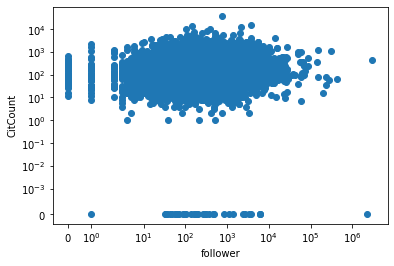

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dfdupr['follower'],dfdupr['CitCount'])
plt.plot(dfdupr['follower'],dfdupr['follower'])
plt.yscale('symlog',linthreshy=0.001)
plt.xscale('symlog',linthreshy=0.001)
plt.xlabel('follower')
plt.ylabel('CitCount')
plt.show()

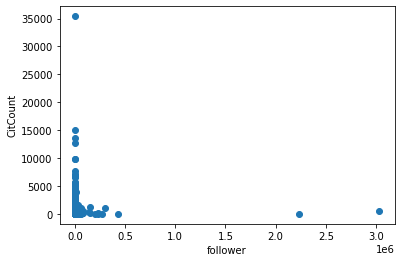

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dfdupr['follower'],dfdupr['CitCount'])
plt.xlabel('follower')
plt.ylabel('CitCount')
plt.show()

### That's All